In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/mac/Desktop/Project/spaceship-titanic/train.csv')
test = pd.read_csv('/Users/mac/Desktop/Project/spaceship-titanic/test.csv')

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.shape

(8693, 14)

In [5]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
data.dropna(subset = 'Name', inplace = True)
data['Name'].isnull().sum()

0

In [7]:
data.describe(include = object)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8493,8299,8286,8296,8315,8291,8493
unique,8493,3,2,6438,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4496,5311,8,5779,8095,2


In [8]:
data['Name'].value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [9]:
data['Name'].duplicated().sum()

20

In [10]:
data.drop_duplicates(subset = 'Name', inplace = True)
data['Name'].duplicated().sum()

0

In [11]:
data.describe(include = object)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8473,8279,8266,8277,8295,8271,8473
unique,8473,3,2,6423,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Maham Ofracculy
freq,1,4483,5298,8,5766,8075,1


In [12]:
data['HomePlanet'].replace(np.nan, 'Earth', inplace = True)
data['CryoSleep'].replace(np.nan, 'False', inplace = True)
data['Destination'].replace(np.nan, 'TRAPPIST-1e', inplace = True)
data['VIP'].replace(np.nan, 'False', inplace = True)

In [13]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8297.000000,8293.000000,8295.000000,8269.000000,8296.000000,8289.000000
mean,28.849584,224.380803,457.629295,171.985972,311.625362,301.729038
std,14.453515,666.648894,1613.104600,553.751582,1143.991987,1117.376716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,46.000000,78.500000,26.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [14]:
data['Age'].replace(np.nan, data['Age'].mean(), inplace = True)
data['RoomService'].replace(np.nan, data['RoomService'].mean(), inplace = True)
data['FoodCourt'].replace(np.nan, data['FoodCourt'].mean(), inplace = True)
data['ShoppingMall'].replace(np.nan, data['ShoppingMall'].mean(), inplace = True)
data['Spa'].replace(np.nan, data['Spa'].mean(), inplace = True)
data['VRDeck'].replace(np.nan, data['VRDeck'].mean(), inplace = True)

In [15]:
print('Null', data.isnull().sum())
print('Duplicate', data.duplicated().sum())

Null PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           196
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
dtype: int64
Duplicate 0


In [16]:
data.drop(columns = ['Cabin', 'Name'], inplace = True)

In [17]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [18]:
data['Age'] = data['Age'].astype(int)
data['CryoSleep'] = data['CryoSleep'].astype(str)
data['VIP'] = data['VIP'].astype(str)
data['Transported'] = data['Transported'].astype(str)

In [19]:
from sklearn.preprocessing import LabelEncoder
data['HomePlanet'] = LabelEncoder().fit(data['HomePlanet']).transform(data['HomePlanet'])
data['CryoSleep'] = LabelEncoder().fit(data['CryoSleep']).transform(data['CryoSleep'])
data['Destination'] = LabelEncoder().fit(data['Destination']).transform(data['Destination'])
data['VIP'] = LabelEncoder().fit(data['VIP']).transform(data['VIP'])

In [20]:
data['Transported'].replace({'True' : 1}, inplace = True)
data['Transported'].replace({'False' : 0}, inplace = True)

In [21]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,0,2,39,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,0,0,2,24,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,1,0,2,58,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,1,0,2,33,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,0,0,2,16,0,303.0,70.0,151.0,565.0,2.0,1


In [22]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = ['PassengerId', 'Transported'])
Y = data['Transported']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)
print('Train shape', x_train.shape, y_train.shape)
print('Test shape', x_test.shape, y_test.shape)


Train shape (5931, 10) (5931,)
Test shape (2542, 10) (2542,)


In [23]:
from sklearn.preprocessing import StandardScaler
X_train_nor = StandardScaler().fit(x_train).transform(x_train)
X_test_nor = StandardScaler().fit(x_test).transform(x_test)
print(X_train_nor[:5])
print(X_test_nor[:5])

[[ 0.43483634  1.35066121 -1.8435995   1.06583527 -0.15942063 -0.34657106
  -0.28762892 -0.32326255 -0.28210237 -0.27888112]
 [-0.82138106  1.35066121 -0.61113911  0.64744431 -0.15942063 -0.34657106
  -0.28762892 -0.32326255 -0.28210237 -0.27888112]
 [-0.82138106  1.35066121 -0.61113911  0.22905335 -0.15942063 -0.34657106
  -0.28762892 -0.32326255 -0.28210237 -0.27888112]
 [-0.82138106 -0.74037811  0.62132129 -0.39853308 -0.15942063 -0.34657106
  -0.27823432  1.26135754 -0.26767254 -0.27607131]
 [-0.82138106  1.35066121 -1.8435995   0.64744431 -0.15942063  0.00500773
  -0.28762892 -0.32326255 -0.28210237 -0.27888112]]
[[ 0.45101888 -0.7200823  -1.81537601 -0.28885737 -0.14019641 -0.32810377
  -0.19371802  1.98075637  0.15465028 -0.08923475]
 [ 1.71228401 -0.7200823   0.61788833  1.96330537  7.13285013  0.28752154
  -0.27086483  2.10819337 -0.25749532 -0.26182373]
 [ 0.45101888 -0.7200823   0.61788833  1.89292529 -0.14019641 -0.11157349
   0.81295375 -0.29801846  0.0212097   1.03385645]

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

search = GridSearchCV(LogisticRegression(), {
    'penalty' : ['l1', 'l2', 'elasticnet'], 
    'C' : [0.001, 0.01, 0.1, 1],
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 
})

search.fit(X_train_nor, y_train)
search.cv_results_


/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

{'mean_fit_time': array([0.00807567, 0.00696945, 0.01494184, 0.0009604 , 0.0504066 ,
        0.06541514, 0.02951336, 0.00647388, 0.01960473, 0.02617707,
        0.00238724, 0.00146012, 0.00169969, 0.0028018 , 0.00352454,
        0.00193019, 0.00136271, 0.00995884, 0.00085301, 0.02419596,
        0.01228304, 0.03095822, 0.03454046, 0.06785479, 0.04844694,
        0.00166354, 0.00151677, 0.00469203, 0.0023468 , 0.00376878,
        0.00092273, 0.00122709, 0.01005445, 0.00094838, 0.04668179,
        0.02007461, 0.03764706, 0.01312165, 0.02987866, 0.03182912,
        0.00082064, 0.00080419, 0.0008018 , 0.00079675, 0.00198903,
        0.00081306, 0.00094681, 0.01527739, 0.001899  , 0.07812595,
        0.02271376, 0.03095188, 0.01918864, 0.02299476, 0.06757541,
        0.00162797, 0.00141282, 0.00100737, 0.00121236, 0.00251632]),
 'std_fit_time': array([3.38325329e-03, 1.65793824e-03, 8.51028695e-03, 1.13639349e-04,
        2.41780578e-02, 4.24861526e-02, 1.04850642e-02, 3.64203608e-04,
     

In [25]:
logistic_data = pd.DataFrame(search.cv_results_)
logistic_data[['param_penalty', 'param_C', 'param_solver', 'mean_test_score']].sort_values(by = 'mean_test_score', ascending = False)

,param_penalty,param_C,param_solver,mean_test_score
32,l1,0.1,liblinear,0.780644
34,l1,0.1,saga,0.780307
53,l2,1,sag,0.779970
52,l2,1,liblinear,0.779970
51,l2,1,newton-cg,0.779970
50,l2,1,lbfgs,0.779970
54,l2,1,saga,0.779970
49,l1,1,saga,0.779633
47,l1,1,liblinear,0.779633
36,l2,0.1,newton-cg,0.779295


In [26]:
print('Best estimator', search.best_estimator_)
print('Best parameter', search.best_params_)
print('Best score', search.best_score_)

Best estimator LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Best parameter {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score 0.7806440201678952


In [27]:
lr = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear')
lr.fit(X_train_nor, y_train)
predictions = lr.predict(X_test_nor)
print('Accuracy score', accuracy_score(y_test, predictions))

Accuracy score 0.7785208497246263


In [28]:
print('Values count', data['HomePlanet'].value_counts())
print('Values count', data['CryoSleep'].value_counts())
print('Values count', data['Destination'].value_counts())
print('Values count', data['Age'].value_counts())
print('Values count', data['VIP'].value_counts())

Values count 0    4677
1    2081
2    1715
Name: HomePlanet, dtype: int64
Values count 0    5505
1    2968
Name: CryoSleep, dtype: int64
Values count 2    5944
0    1752
1     777
Name: Destination, dtype: int64
Values count 28    436
18    312
24    311
21    306
19    288
     ... 
72      4
78      3
79      3
76      2
77      1
Name: Age, Length: 80, dtype: int64
Values count 0    8277
1     196
Name: VIP, dtype: int64


In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

search_ = GridSearchCV(DecisionTreeClassifier(), {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'], 
    'max_depth' : [5], 
    'min_samples_split' : [2],
})

search_.fit(X_train_nor, y_train)
search_.cv_results_

{'mean_fit_time': array([0.00856738, 0.00289502, 0.01040797, 0.00303121, 0.01192837,
        0.0037044 ]),
 'std_fit_time': array([0.00037994, 0.00011099, 0.00124297, 0.0004829 , 0.0017907 ,
        0.00093147]),
 'mean_score_time': array([0.00105968, 0.00091395, 0.0011385 , 0.00092502, 0.00144262,
        0.00131311]),
 'std_score_time': array([4.50050924e-05, 2.55019181e-05, 2.59131116e-04, 5.95961374e-05,
        3.49672345e-04, 4.33188899e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'entropy', 'entropy', 'log_loss',
                    'log_loss'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5, 5, 5, 5, 5, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 2, 2, 2, 2, 2],
              mask=[False, False, False, False, False, False],
       

In [30]:
tree_data = pd.DataFrame(search_.cv_results_)
tree_data[['param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_splitter', 'mean_test_score']].sort_values(by = 'mean_test_score', ascending = False)

,param_criterion,param_max_depth,param_min_samples_split,param_splitter,mean_test_score
0,gini,5,2,best,0.764626
2,entropy,5,2,best,0.761928
4,log_loss,5,2,best,0.761928
5,log_loss,5,2,random,0.745913
1,gini,5,2,random,0.743385
3,entropy,5,2,random,0.728546


In [31]:
print('Best estimator', search_.best_estimator_)
print('Best parameter', search_.best_params_)
print('Best score', search_.best_score_)

Best estimator DecisionTreeClassifier(max_depth=5)
Best parameter {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'splitter': 'best'}
Best score 0.7646264833617705


In [32]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 2, splitter = 'best')
decision_tree.fit(X_train_nor, y_train)
prediction = decision_tree.predict(X_test_nor)
print('Accuracy_score', accuracy_score(y_test, prediction))

Accuracy_score 0.7745869394177812


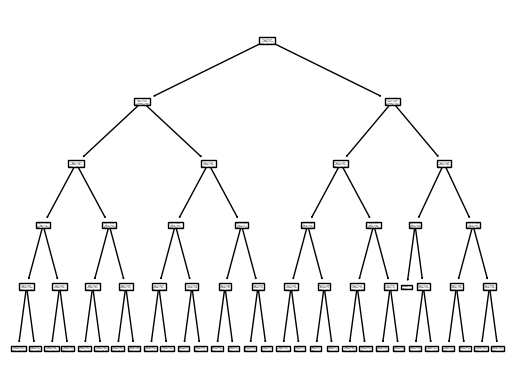

In [33]:
tree.plot_tree(decision_tree)
plt.show()

In [34]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [35]:
test.drop(columns = ['Name', 'Cabin'], inplace = True)

In [36]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [37]:
test.describe(include = object)

,PassengerId,HomePlanet,CryoSleep,Destination,VIP
count,4277,4190,4184,4185,4184
unique,4277,3,2,3,2
top,0013_01,Earth,False,TRAPPIST-1e,False
freq,1,2263,2640,2956,4110


In [38]:
test['HomePlanet'].replace(np.nan, 'Earth', inplace = True)
test['CryoSleep'].replace(np.nan, 'False', inplace = True)
test['Destination'].replace(np.nan, 'TRAPPIST-1e', inplace = True)
test['VIP'].replace(np.nan, 'False', inplace = True)

In [39]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [40]:
test['Age'].replace(np.nan, test['Age'].mean(), inplace = True)
test['RoomService'].replace(np.nan, test['RoomService'].mean(), inplace = True)
test['FoodCourt'].replace(np.nan, test['FoodCourt'].mean(), inplace = True)
test['ShoppingMall'].replace(np.nan, test['ShoppingMall'].mean(), inplace = True)
test['Spa'].replace(np.nan, test['Spa'].mean(), inplace = True)
test['VRDeck'].replace(np.nan, test['VRDeck'].mean(), inplace = True)

In [41]:
print('Null', test.isnull().sum())
print('Duplicated', test.duplicated().sum())

Null PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64
Duplicated 0


In [42]:
test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [43]:
test['Age'] = test['Age'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(str)
test['VIP'] = test['VIP'].astype(str)

In [44]:
test['HomePlanet'] = LabelEncoder().fit(test['HomePlanet']).transform(test['HomePlanet'])
test['CryoSleep'] = LabelEncoder().fit(test['CryoSleep']).transform(test['CryoSleep'])
test['Destination'] = LabelEncoder().fit(test['Destination']).transform(test['Destination'])
test['VIP'] = LabelEncoder().fit(test['VIP']).transform(test['VIP'])

In [45]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,1,2,27,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,0,2,19,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,1,0,31,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,0,2,38,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,0,2,20,0,10.0,0.0,635.0,0.0,0.0


In [46]:
x = test.drop(columns = ['PassengerId'])
x_nor = StandardScaler().fit(x).transform(x)
print('x_nor.shape', x_nor.shape)

x_nor.shape (4277, 10)


In [47]:
y_predictions = lr.predict(x_nor)
y_prediction = decision_tree.predict(x_nor)
y_prediction.reshape(4277, 1)
y_predictions.reshape(4277, 1)

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [48]:
submission_lr = pd.DataFrame(y_predictions)
test = pd.concat([test, submission_lr], axis = 1)
test.drop(columns = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace = True)
test.rename(columns = {0 : 'Transported'}, inplace = True)
test.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [49]:
test['Transported'] = test['Transported'].astype(bool)
test.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [50]:
test.to_csv('/Users/mac/Desktop/Submission_LR.csv', index = False)

In [51]:
submission_dt = pd.DataFrame(y_prediction)
test = pd.concat([test, submission_dt], axis = 1)
test.drop(columns = ['Transported'], inplace = True)
test.rename(columns = {0 : 'Transported'}, inplace = True)
test.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [52]:
test['Transported'] = test['Transported'].astype(bool)
test.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [53]:
test.to_csv('/Users/mac/Desktop/Submission_DT.csv', index = False)